<a href="https://colab.research.google.com/github/bangjaia/Data-Science-and-Analysis/blob/main/%EC%B0%A8%EC%9B%90%EC%9D%98%20%EA%B2%BD%EB%A1%9C%EB%A5%BC%20%EC%B0%BE%EC%95%84%EB%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits

def calculate_mean_centered(data):
    mean_vector = [sum(col) / len(col) for col in zip(*data)]
    centered_data = []
    for row in data:
        centered_row = [row[i] - mean_vector[i] for i in range(len(row))]
        centered_data.append(centered_row)
    return centered_data, mean_vector


def calculate_covariance_matrix(data):
    num_samples = len(data)
    num_features = len(data[0])
    cov_matrix = [[0.0] * num_features for _ in range(num_features)]

    for i in range(num_features):
        for j in range(num_features):
            s = 0.0
            for k in range(num_samples):
                s += data[k][i] * data[k][j]
            cov_matrix[i][j] = s / (num_samples - 1)

    return cov_matrix


def dot_product(a, b):
    return sum(x * y for x, y in zip(a, b))


def matrix_vector_product(matrix, vector):
    return [dot_product(row, vector) for row in matrix]


def normalize_vector(v):
    length = (sum(x * x for x in v)) ** 0.5
    return [x / length for x in v]


def power_iteration(matrix, iterations=200):
    num_features = len(matrix)
    eigen_vector = [1.0] * num_features

    for _ in range(iterations):
        eigen_vector = matrix_vector_product(matrix, eigen_vector)
        eigen_vector = normalize_vector(eigen_vector)

    eigen_value = dot_product(
        eigen_vector,
        matrix_vector_product(matrix, eigen_vector)
    )
    return eigen_value, eigen_vector


def subtract_projection(matrix, eigen_value, eigen_vector):
    size = len(matrix)
    new_matrix = [[matrix[i][j] for j in range(size)] for i in range(size)]

    for i in range(size):
        for j in range(size):
            new_matrix[i][j] -= eigen_value * eigen_vector[i] * eigen_vector[j]
    return new_matrix


def pca_reduce_to_2d(data):
    centered_data, _ = calculate_mean_centered(data)
    cov_matrix = calculate_covariance_matrix(centered_data)

    eigen_value1, eigen_vector1 = power_iteration(cov_matrix)
    reduced_matrix = subtract_projection(cov_matrix, eigen_value1, eigen_vector1)

    eigen_value2, eigen_vector2 = power_iteration(reduced_matrix)

    reduced_data = []
    for row in centered_data:
        x = dot_product(row, eigen_vector1)
        y = dot_product(row, eigen_vector2)
        reduced_data.append((x, y))

    return reduced_data

def visualize_ascii(reduced_data, labels, width=60, height=30):
    min_x = min(x for x, _ in reduced_data)
    max_x = max(x for x, _ in reduced_data)
    min_y = min(y for _, y in reduced_data)
    max_y = max(y for _, y in reduced_data)

    grid = [[' ' for _ in range(width)] for _ in range(height)]

    for (x, y), label in zip(reduced_data, labels):
        xi = int((x - min_x) / (max_x - min_x) * (width - 1))
        yi = int((y - min_y) / (max_y - min_y) * (height - 1))
        yi = height - yi - 1
        if 0 <= yi < height and 0 <= xi < width:
            grid[yi][xi] = str(label)

    print('\n=== ASCII Visualization (Digits PCA 2D) ===\n')
    for row in grid:
        print(''.join(row))

def main():
    digits = load_digits()
    data = digits.data.tolist()
    label = digits.target.tolist()

    reduced_2d = pca_reduce_to_2d(data)

    print('\n=== First 10 PCA Results (x, y, label) ===')
    for i in range(10):
        print(f'{reduced_2d[i]}, label={label[i]}')
    visualize_ascii(reduced_2d, label)

if __name__ == '__main__':
    digits = load_digits()
    data = digits.data.tolist()
    labels = digits.target.tolist()

    reduced_2d = pca_reduce_to_2d(data)
    label = labels

    main()


=== First 10 PCA Results (x, y, label) ===
(-1.2594656409243148, 21.274883533113826), label=0
(7.957610510085792, -20.768699286973437), label=1
(6.991922588533245, -9.95598669850021), label=2
(-15.906105128820666, 3.3324649475083183), label=3
(23.306867569817708, 4.269059859748606), label=4
(-14.087086086612524, 7.914449061816762), label=5
(21.363409735870878, 5.288338795743739), label=6
(-2.9526077591229387, -21.071664171109425), label=7
(-5.25513421587926, 1.183360129022419), label=8
(-5.4801985130474735, 8.076324399953547), label=9

=== ASCII Visualization (Digits PCA 2D) ===

                            0                               
                        0 0    0                            
                       000  00000 00                        
                       0000 00 00000 0 6                    
                   0  00000000 000 000                      
                        0000000000000600 66                 
                 0   000 00 0000 06000606  6  

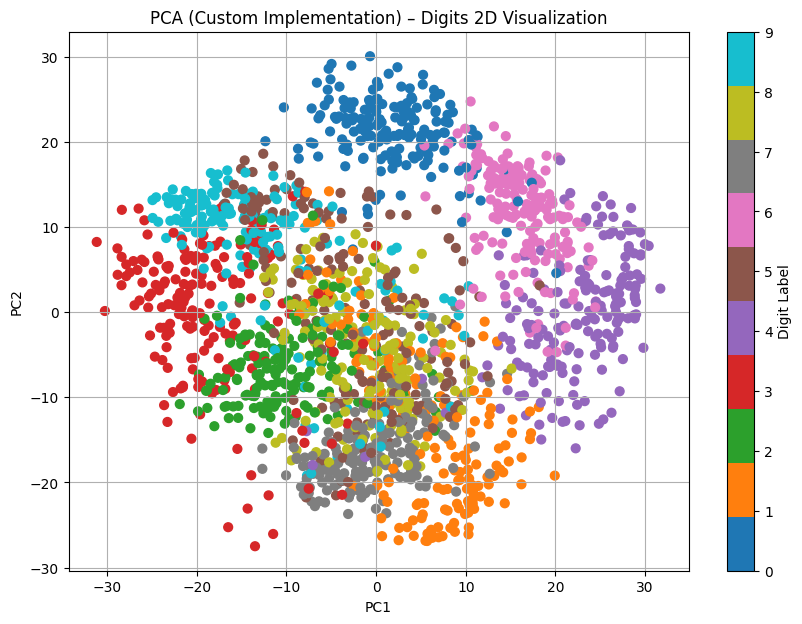

In [ ]:
import matplotlib.pyplot as plt

def visualize_plot(reduced_data, labels):
    x = [p[0] for p in reduced_data]
    y = [p[1] for p in reduced_data]

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(x, y, c=labels, cmap='tab10', s=40)
    plt.colorbar(scatter, label='Digit Label')
    plt.title('PCA (Custom Implementation) – Digits 2D Visualization')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    plt.show()

visualize_plot(reduced_2d, label)